# K近傍法 (K nearest neighbors)

ノンパラメトリック(予測時に関数の形が決まっていない)。予測時に、その予測するデータから近い順に学習データをk個ピックアップして多数決でクラスを分類する。次元が大きくなるほど、近傍が不確かになり、精度が落ちる。

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.9000,3.0000,4.2000,1.5000,1
1,5.8000,2.6000,4.0000,1.2000,1
2,6.8000,3.0000,5.5000,2.1000,2
3,4.7000,3.2000,1.3000,0.2000,0
4,6.9000,3.1000,5.1000,2.3000,2


In [3]:
X_train = train.iloc[:,0:4]
y_train = train.iloc[:,4]
X_test = test.iloc[:,0:4]
y_test = test.iloc[:,4]

## 標準化

In [4]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
scl.fit(X_train) #学習用データで標準化

X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

In [5]:
pd.DataFrame(X_train_std).describe()


,0,1,2,3
count,112.0000,112.0000,112.0000,112.0000
mean,0.0000,0.0000,0.0000,-0.0000
std,1.0045,1.0045,1.0045,1.0045
min,-1.8291,-2.4221,-1.5042,-1.4438
25%,-0.9068,-0.5798,-1.2392,-1.1868
50%,-0.0998,-0.1193,0.2530,0.0987
75%,0.7071,0.5716,0.7830,0.8700
max,2.3211,3.1047,1.7313,1.6413


## k近傍法の学習

kについてのパラメーターを交差検証

Best parameters : {'n_neighbors': 6}
Best cross-validation score : 0.956
score : 97.37%
{'n_neighbors': 1},精度:0.938 ,標準誤差=(+/- 0.0217) 
{'n_neighbors': 2},精度:0.947 ,標準誤差=(+/- 0.0424) 
{'n_neighbors': 3},精度:0.938 ,標準誤差=(+/- 0.0461) 
{'n_neighbors': 4},精度:0.947 ,標準誤差=(+/- 0.0513) 
{'n_neighbors': 5},精度:0.955 ,標準誤差=(+/- 0.0498) 
{'n_neighbors': 6},精度:0.956 ,標準誤差=(+/- 0.0398) 
{'n_neighbors': 7},精度:0.956 ,標準誤差=(+/- 0.0398) 
{'n_neighbors': 8},精度:0.956 ,標準誤差=(+/- 0.0398) 
{'n_neighbors': 9},精度:0.947 ,標準誤差=(+/- 0.0333) 
{'n_neighbors': 10},精度:0.947 ,標準誤差=(+/- 0.0333) 
{'n_neighbors': 11},精度:0.947 ,標準誤差=(+/- 0.0333) 
{'n_neighbors': 12},精度:0.956 ,標準誤差=(+/- 0.0398) 
{'n_neighbors': 13},精度:0.947 ,標準誤差=(+/- 0.0513) 
{'n_neighbors': 14},精度:0.938 ,標準誤差=(+/- 0.0654) 
{'n_neighbors': 15},精度:0.93 ,標準誤差=(+/- 0.0653) 
{'n_neighbors': 16},精度:0.938 ,標準誤差=(+/- 0.0654) 
{'n_neighbors': 17},精度:0.93 ,標準誤差=(+/- 0.0653) 
{'n_neighbors': 18},精度:0.93 ,標準誤差=(+/- 0.0805) 
{'n_neighbors': 19},精度:0.93 ,標準誤差=(+/- 0.0

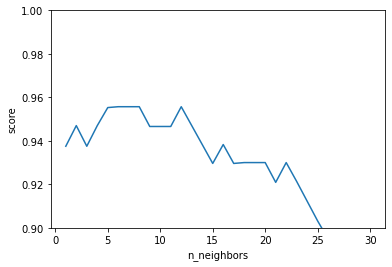

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

params ={'n_neighbors': range(1, 31) }# K = 1~30

grid = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = params,
    cv = 5
)
grid.fit(X_train_std, y_train)

print("Best parameters : {}".format(grid.best_params_))
print("Best cross-validation score : {:.3f}".format(grid.best_score_))
print("score : {:.2f}%".format(grid.score(X_test_std, y_test)*100))

list_nn = []
list_score = []

for i, param in enumerate(grid.cv_results_["params"]):
    param_n_neighbors = grid.cv_results_["param_n_neighbors"][i]
    mean_test_score = grid.cv_results_["mean_test_score"][i]
    std_test_score = grid.cv_results_["std_test_score"][i]
    print ("{0},精度:{1} ,標準誤差=(+/- {2}) ".format(param, round((mean_test_score),3), round(std_test_score,4))) # 各パラメータごとの精度を確認

    list_nn.append(param_n_neighbors)
    list_score.append(mean_test_score)

plt.ylim(0.9, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

## 決定境界(Decision Boundaly)

/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
/home/jovyan/work/public/iris分類アルゴリズム/script/decision_boundary.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have t

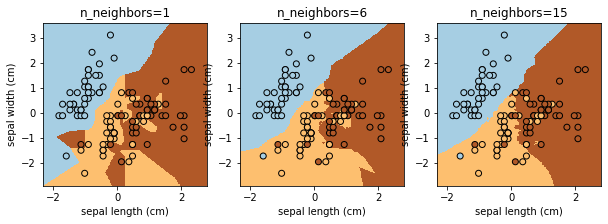

In [24]:
from script import decision_boundary
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# モジュールの再読み込み
# import importlib
# importlib.reload(decision_boundary)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, n_neighbors in zip(axes, [1, 6, 15]):
    title = "n_neighbors=%s"% (n_neighbors)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary.decision_boundary(clf, X_train_std[:,0:2], y_train, ax,train.columns[0],train.columns[1],title)
